In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random
from scipy.stats import norm

#theta is 1st, Y(theta) is 2nd
eval_points = [[0.3,0.35,0.39,0.41,0.45],[0.5,0.32,0.4,0.35,0.6]]

#expected value and variance is constant
expected_val_ytheta = 0.5
var_ytheta = 0.5**2

#correlation between theta points
def corr(theta1,theta2):
    return ((1 + 15*abs(theta1-theta2))*np.exp(-15*abs(theta1-theta2)))

## Task a
Computing the conditional mean and covariance matrix for the process with 5 evaluation point, and displaying the results.

In [2]:
#defining the regular grid
grid_of_thetas = np.linspace(0.25,0.50,51)

#making the B-block
B_grid=eval_points[0]
B_vals=eval_points[1]

#deleting the observed values from the grid
#found out the easiest way to do this was to count the indices and delete by index
A_grid=np.delete(grid_of_thetas,10)
A_grid=np.delete(A_grid,19)
A_grid=np.delete(A_grid,26)
A_grid=np.delete(A_grid,29)
A_grid=np.delete(A_grid,36)



#making a vector with the expected values for the grid
#as we know that every theta has the same expected value, they will all be 0.5
mean_vec_A = np.zeros(46)
mean_vec_A.fill(0.5)


#making the covariance matrix for A
cov_mat_A = np.zeros((46,46))
for i in range(len(mean_vec_A)):
    for j in range(len(mean_vec_A)):
        if i==j:
            cov_mat_A[i,i]=0.5**2
        else:
            cov_mat_A[i,j]=corr(A_grid[i],A_grid[j])*(0.5**2)
#we also need to fill the eval points into the grid
#and also into the mean vector

#making the covariance matrix AB
cov_mat_AB = np.zeros((46,5))
for i in range(46):
    for j in range(5):
        cov_mat_AB[i,j] = corr(B_grid[j],A_grid[i])*(0.5**2)

#covariance matrix BA is the transpose of AB
cov_mat_BA = np.transpose(cov_mat_AB)

#making the mean vector for block B
mean_vec_B=np.zeros(5)
mean_vec_B.fill(0.5)

#making the covariance matrix for block B
cov_mat_B = np.zeros((5,5))
for i in range(len(mean_vec_B)):
    for j in range(len(mean_vec_B)):
        if i==j:
            cov_mat_B[i,i]=0.5**2
        else:
            cov_mat_B[i,j]=corr(B_grid[i],B_grid[j])*(0.5**2)



(51,)
(51,)


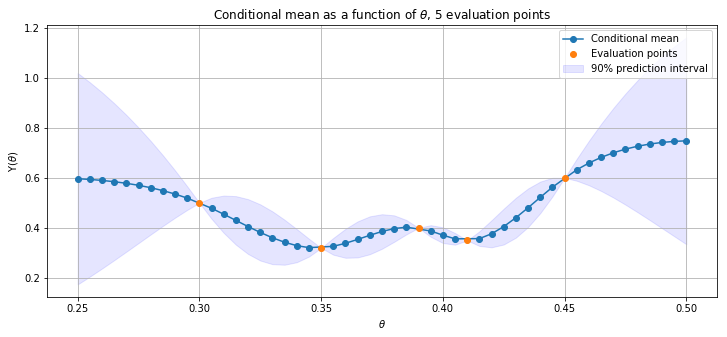

In [3]:
#computing the conditional mean and conditional covariance matrix
cond_mean =  mean_vec_A + cov_mat_AB@np.linalg.inv(cov_mat_B)@(B_vals-mean_vec_B)
cond_var = cov_mat_A - cov_mat_AB@np.linalg.inv(cov_mat_B)@cov_mat_BA

#the diagonals contain the variance to each value
diagonals=np.zeros(46)
for i in range(46):
    diagonals[i]=cond_var[i,i]
    
    
#we already have grid_of_thetas with all the values
#we know the diagonals equate the variance of the predicted values, while the variance of the evaluated points equal zero
#we already know the indices of the evaluated points in the grid_of_thetas: 10,20,28,32,40


all_var_vals = np.insert(diagonals,10,0)
all_var_vals = np.insert(all_var_vals,20,0)
all_var_vals = np.insert(all_var_vals,28,0)
all_var_vals = np.insert(all_var_vals,32,0)
all_var_vals = np.insert(all_var_vals,40,0)

print(np.shape(all_var_vals))

mean_vals = np.insert(cond_mean,10,B_vals[0])
mean_vals = np.insert(mean_vals,20,B_vals[1])
mean_vals = np.insert(mean_vals,28,B_vals[2])
mean_vals = np.insert(mean_vals,32,B_vals[3])
mean_vals = np.insert(mean_vals,40,B_vals[4])

print(np.shape(mean_vals))


#what im doing here is 95% down and 95% up in order to get a 90% confidence interval
ci = 1.645 * np.sqrt(all_var_vals)
fig, ax = plt.subplots(figsize=(12,5))
plt.title("Conditional mean as a function of "+str(r'$\theta$')+", 5 evaluation points")
plt.plot(A_grid,cond_mean,"-o",label = "Conditional mean")
plt.plot(B_grid,B_vals,"o", label = "Evaluation points")
ax.fill_between(grid_of_thetas, (mean_vals-ci), (mean_vals+ci), color='b', alpha=.1,label="90% prediction interval")
plt.xlabel(r'$\theta$')
plt.ylabel("Y("+str(r'$\theta$')+")")
plt.legend()
plt.grid()
plt.savefig('condmeantaskA.pdf')
plt.show()


## Task b
Computing the conditional probability that Y($\theta$)<0.3, given the 5 evaluation points.

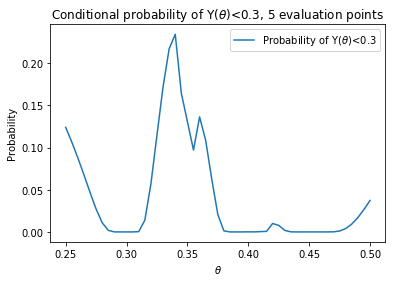

In [4]:
#goal: y(theta) less than 30
#compute conditional probability that Y(theta)<0.3 given the 5 eval pts
#plot the probability as a fnc of theta



lesser_than = norm.cdf(0.3,cond_mean,np.sqrt(diagonals))
plt.plot(A_grid,lesser_than,"-",label="Probability of Y("+str(r'$\theta$')+")<0.3")
plt.title("Conditional probability of Y("+str(r'$\theta$')+")<0.3, 5 evaluation points",)
plt.xlabel(r'$\theta$')
plt.ylabel("Probability")
plt.legend()
plt.savefig('condprobtaskB.pdf')
plt.show()

## Task c
Computing and visualizing the conditional mean, 6 evaluation points. Computing and visualizing the conditional probability that Y($\theta$)<0.3 for this amount of evaluation points. Finding a value of $\theta$ to suggest to the scientists.

In [5]:
#deleting the observed value from grid A
A_grid = np.delete(A_grid,15)

#adding the observation to block B
B_grid = np.append(B_grid,0.33)
B_vals = np.append(B_vals,0.40)

In [6]:
#making a new mean vector for A
mean_vec_A = np.zeros(45)
mean_vec_A.fill(0.5)

#making a new covariance matrix for A
cov_mat_A = np.zeros((45,45))
for i in range(len(mean_vec_A)):
    for j in range(len(mean_vec_A)):
        if i==j:
            cov_mat_A[i,i]=0.5**2
        else:
            cov_mat_A[i,j]=corr(A_grid[i],A_grid[j])*(0.5**2)


#making a new covariance matrix AB
cov_mat_AB = np.zeros((45,6))
for i in range(45):
    for j in range(6):
        cov_mat_AB[i,j] = corr(B_grid[j],A_grid[i])*(0.5**2)

#making a new covariance matrix BA
cov_mat_BA = np.transpose(cov_mat_AB)

#making a new mean vector for B
mean_vec_B=np.zeros(6)
mean_vec_B.fill(0.5)


#making a new covariance matrix for B
cov_mat_B = np.zeros((6,6))
for i in range(len(mean_vec_B)):
    for j in range(len(mean_vec_B)):
        if i==j:
            cov_mat_B[i,i]=0.5**2
        else:
            cov_mat_B[i,j]=corr(B_grid[i],B_grid[j])*(0.5**2)

In [7]:
cond_mean =  mean_vec_A + cov_mat_AB@np.linalg.inv(cov_mat_B)@(B_vals-mean_vec_B)
cond_var = cov_mat_A - cov_mat_AB@np.linalg.inv(cov_mat_B)@cov_mat_BA

#calculating the variance
diagonals=np.zeros(45)
for i in range(45):
    diagonals[i]=cond_var[i,i]


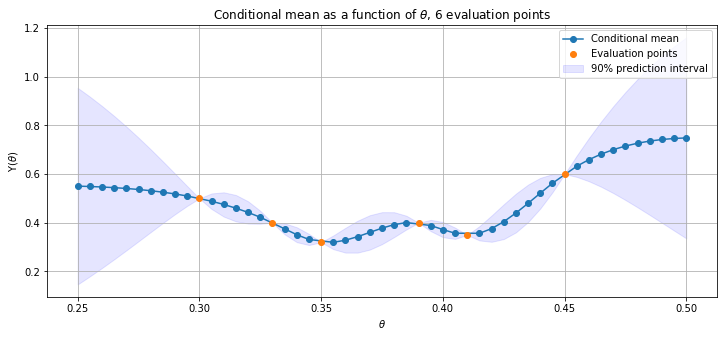

In [8]:
#we already have grid_of_thetas with all the values
#we know the diagonals equate the variance of the predicted values, while the variance of the evaluated points equal zero
#we already know the indices of the evaluated points in the grid_of_thetas: 10,20,28,32,40, and 16


all_var_vals = np.insert(diagonals,10,0)
all_var_vals = np.insert(all_var_vals,16,0)
all_var_vals = np.insert(all_var_vals,20,0)
all_var_vals = np.insert(all_var_vals,28,0)
all_var_vals = np.insert(all_var_vals,32,0)
all_var_vals = np.insert(all_var_vals,40,0)

mean_vals = np.insert(cond_mean,10,B_vals[0])
mean_vals = np.insert(mean_vals,16,B_vals[5])
mean_vals = np.insert(mean_vals,20,B_vals[1])
mean_vals = np.insert(mean_vals,28,B_vals[2])
mean_vals = np.insert(mean_vals,32,B_vals[3])
mean_vals = np.insert(mean_vals,40,B_vals[4])


#what im doing here is 95% down and 95% up in order to get a 90% confidence interval
ci = 1.645 * np.sqrt(all_var_vals)
fig, ax = plt.subplots(figsize=(12,5))
plt.title("Conditional mean as a function of "+str(r'$\theta$')+", 6 evaluation points")
plt.plot(A_grid,cond_mean,"-o",label = "Conditional mean")
plt.plot(B_grid,B_vals,"o", label = "Evaluation points")
ax.fill_between(grid_of_thetas, (mean_vals-ci), (mean_vals+ci), color='b', alpha=.1,label="90% prediction interval")
plt.xlabel(r'$\theta$')
plt.ylabel("Y("+str(r'$\theta$')+")")
plt.legend()
plt.grid()
plt.savefig('condmeantaskC.pdf')
plt.show()

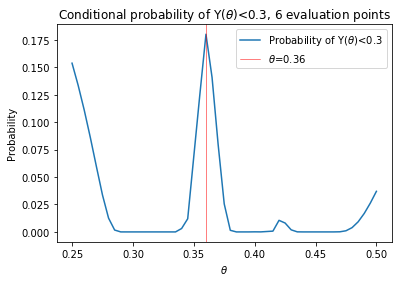

In [9]:
#goal: y(theta) less than 30
#compute conditional probability that Y(theta)<0.3 given the 5 eval pts
#plot the probability as a fnc of theta


#in order for the scientist to find y(theta)<0.3 we should look at the point with the highest probability for this
#the endpoints have quite a high probability, however they also have a high variance and confidence interval
#therefore, we would like to look at the maximum value
lesser_than = norm.cdf(0.3,cond_mean,np.sqrt(diagonals))


max_index= np.argmax(lesser_than)


plt.plot(A_grid,lesser_than,"-", label="Probability of Y("+str(r'$\theta$')+")<0.3")
plt.title("Conditional probability of Y("+str(r'$\theta$')+")<0.3, 6 evaluation points")
plt.axvline(A_grid[max_index],color="r", linewidth=0.5,label=str(r'$\theta$')+"="+str(A_grid[max_index]))
plt.xlabel(r'$\theta$')
plt.ylabel("Probability")
plt.legend()
plt.savefig('condprobtaskC.pdf')
plt.show()

In [10]:
print(A_grid[max_index],"is the value of theta we would suggest for the climate model in order to obtain a lower y-val than 0.3.")

0.36 is the value of theta we would suggest for the climate model in order to obtain a lower y-val than 0.3.
